In [4]:
from collections import defaultdict

In [5]:
facts = defaultdict(set)
count = 0
f=0
m=0
with open("основные_списки_уни_2_fm.csv") as ff:
    for i in ff.readlines()[1:]:
        count += 1
        ii = i.rstrip().split(';')
        if ii[0] == 'f':
            f = f + 1
        elif ii[0] == 'm':
            m = m + 1
        facts[ii[-1]].add(' '.join(filter(None, ii[:-1])))
print(count, m, f)

125 56 69


In [6]:
facts.keys()

dict_keys(['Геологический', 'Механико-математический', 'Филологический', 'Юридический', 'Химический', 'ФГУ', 'Физический', 'Биологический', 'Психологии', 'Исторический', 'ФФМ', 'ВМК', 'Экономический', 'ФНМ', 'Журналистики', 'Социологический', 'ВШТ', 'Географический', 'ИСАА', 'Мехмат', 'Биотехнологический', 'Политологии', 'Почвоведения', 'Философский'])

In [7]:
len(facts['Механико-математический'])

14

In [8]:
facts['Механико-математический']=facts['Механико-математический'].union(facts['Мехмат'])

In [9]:
len(facts['Механико-математический'])

15

In [10]:
facts.pop('Мехмат')

{'f Крылова Галина Александровна'}

In [12]:
res=[]
count = 0
for fact in sorted(facts.keys()):
    count += len(facts[fact])
    res.append((fact, len(facts[fact])))
print(res)
print(count)

[('Биологический', 6), ('Биотехнологический', 1), ('ВМК', 5), ('ВШТ', 1), ('Географический', 7), ('Геологический', 11), ('Журналистики', 3), ('ИСАА', 2), ('Исторический', 3), ('Механико-математический', 15), ('Политологии', 2), ('Почвоведения', 2), ('Психологии', 4), ('Социологический', 6), ('ФГУ', 3), ('ФНМ', 4), ('ФФМ', 3), ('Физический', 14), ('Филологический', 7), ('Философский', 2), ('Химический', 8), ('Экономический', 6), ('Юридический', 10)]
125


In [13]:
count=0
for i,j in sorted(res, key=lambda x: x[1], reverse=True):
    count += j
    print(i, j)
print(count)

Механико-математический 15
Физический 14
Геологический 11
Юридический 10
Химический 8
Географический 7
Филологический 7
Биологический 6
Социологический 6
Экономический 6
ВМК 5
Психологии 4
ФНМ 4
Журналистики 3
Исторический 3
ФГУ 3
ФФМ 3
ИСАА 2
Политологии 2
Почвоведения 2
Философский 2
Биотехнологический 1
ВШТ 1
125


In [14]:
import matplotlib.pyplot as plt

In [18]:
#fa = {i:len(j) for i,j in facts.items()}
fa = defaultdict(lambda: [0, 0])
for i,k in facts.items():
    for j in k:
        if j.split(' ')[0] == 'm':
            fa[i][0] += 1
        elif j.split(' ')[0] == 'f':
            fa[i][1] += 1
fa

defaultdict(<function __main__.<lambda>()>,
            {'Геологический': [6, 5],
             'Механико-математический': [12, 3],
             'Филологический': [0, 7],
             'Юридический': [3, 7],
             'Химический': [5, 3],
             'ФГУ': [1, 2],
             'Физический': [10, 4],
             'Биологический': [1, 5],
             'Психологии': [1, 3],
             'Исторический': [0, 3],
             'ФФМ': [1, 2],
             'ВМК': [4, 1],
             'Экономический': [1, 5],
             'ФНМ': [3, 1],
             'Журналистики': [0, 3],
             'Социологический': [0, 6],
             'ВШТ': [0, 1],
             'Географический': [5, 2],
             'ИСАА': [0, 2],
             'Биотехнологический': [1, 0],
             'Политологии': [0, 2],
             'Почвоведения': [1, 1],
             'Философский': [1, 1]})

In [21]:
len(fa.keys())

23

In [22]:
from collections import OrderedDict

In [23]:
fa=OrderedDict(sorted(fa.items(), key=lambda t: t[0]))
fa

OrderedDict([('Биологический', [1, 5]),
             ('Биотехнологический', [1, 0]),
             ('ВМК', [4, 1]),
             ('ВШТ', [0, 1]),
             ('Географический', [5, 2]),
             ('Геологический', [6, 5]),
             ('Журналистики', [0, 3]),
             ('ИСАА', [0, 2]),
             ('Исторический', [0, 3]),
             ('Механико-математический', [12, 3]),
             ('Политологии', [0, 2]),
             ('Почвоведения', [1, 1]),
             ('Психологии', [1, 3]),
             ('Социологический', [0, 6]),
             ('ФГУ', [1, 2]),
             ('ФНМ', [3, 1]),
             ('ФФМ', [1, 2]),
             ('Физический', [10, 4]),
             ('Филологический', [0, 7]),
             ('Философский', [1, 1]),
             ('Химический', [5, 3]),
             ('Экономический', [1, 5]),
             ('Юридический', [3, 7])])

In [25]:
m = [i[0] for i in fa.values()]
f = [i[1] for i in fa.values()]

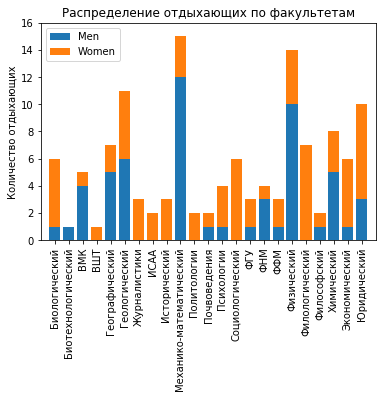

In [27]:
p1 = plt.bar(fa.keys(), m)
p2 = plt.bar(fa.keys(), f, bottom=m)
plt.xticks(list(fa.keys()), list(fa.keys()), rotation='vertical')
plt.ylabel('Количество отдыхающих')
plt.title('Распределение отдыхающих по факультетам')
plt.axis([-1, 23, 0, 16])
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.show()